#### Lead Scoring - Case Study

##### Problem Statement

###### An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Goals of Case Study

###### Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

##### The steps are broadly:

##### 1. Read and understand the data
##### 2. Clean the data
##### 3. Prepare the data for Model Building
##### 4. Model Building
##### 5. Model Evaluation
##### 6. Making Predictions on the Test Set

### Importing libraries and dataset

In [23]:
## Importing necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.options.display.max_columns = None

### Importing lead dataset

In [24]:
lead_score_dataset = pd.read_csv("Leads.csv")
lead_score_dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Visualising dataset

In [25]:
lead_score_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [26]:
lead_score_dataset.shape

(9240, 37)

In [27]:
lead_score_dataset.size

341880

In [28]:
lead_score_dataset.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [29]:
# Converting 'Select' values to NaN

lead_score_dataset = lead_score_dataset.replace('Select', np.nan)

In [30]:
# Checking columns for null values

lead_score_dataset.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [56]:
# calculating null percentages across columns

round(lead_score_dataset.isnull().sum()/len(lead_score_dataset.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [31]:
# Drop columns having missing values more than or equal to 40% 

lead_score_dataset=lead_score_dataset.drop(columns=['Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [32]:
# Finding the null percentages across columns after removing the above columns

round(lead_score_dataset.isnull().sum()/len(lead_score_dataset.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [33]:
lead_score_dataset.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [34]:
# Drop all columns having missing values more than 3000

for col in lead_score_dataset.columns:
    if lead_score_dataset[col].isnull().sum() > 3000:
        lead_score_dataset.drop(col, 1, inplace=True)

In [35]:
# Checking number of null values again

lead_score_dataset.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [37]:
# Dropping variable 'Country' as course is online

lead_score_dataset.drop(['Country'], axis = 1, inplace = True)

In [38]:
#Let's now check the percentage of missing values in each column

round(100*(lead_score_dataset.isnull().sum()/len(lead_score_dataset.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [39]:
# Checking number of null values again

lead_score_dataset.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [40]:
# Get the value counts of all the columns

for column in lead_score_dataset:
    print(lead_score_dataset[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

In [46]:
# Visualizing column

sns.countplot(lead_score_dataset['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [47]:
# Finding percentage of different categories of column

round(lead_score_dataset['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [48]:
# Dropping column 

lead_score_dataset=lead_score_dataset.drop('What matters most to you in choosing a course',axis=1)

In [50]:
sns.countplot(lead_score_dataset['What is your current occupation'])
plt.xticks(rotation=45)

In [51]:
# Finding percentage of different categories of this column

round(lead_score_dataset['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [52]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'

lead_score_dataset['What is your current occupation']=lead_score_dataset['What is your current occupation'].replace(np.nan,'Unemployed')

In [53]:
# Finding the null percentages across columns after removing the above columns

round(lead_score_dataset.isnull().sum()/len(lead_score_dataset.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [54]:
# Dropping the rows with null values

lead_score_dataset.dropna(inplace = True)

In [55]:
# Finding the null percentages across columns after removing the above columns

round(lead_score_dataset.isnull().sum()/len(lead_score_dataset.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [56]:
# Percentage of rows retained

(len(lead_score_dataset.index)/9240)*100

98.2034632034632

# EDA (Exploratory Data Analysis)

In [57]:
lead_score_dataset[lead_score_dataset.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## Analysis

### Converted

In [58]:
Converted = (sum(lead_score_dataset['Converted'])/len(lead_score_dataset['Converted'].index))*100
Converted

37.85541106458012

### Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

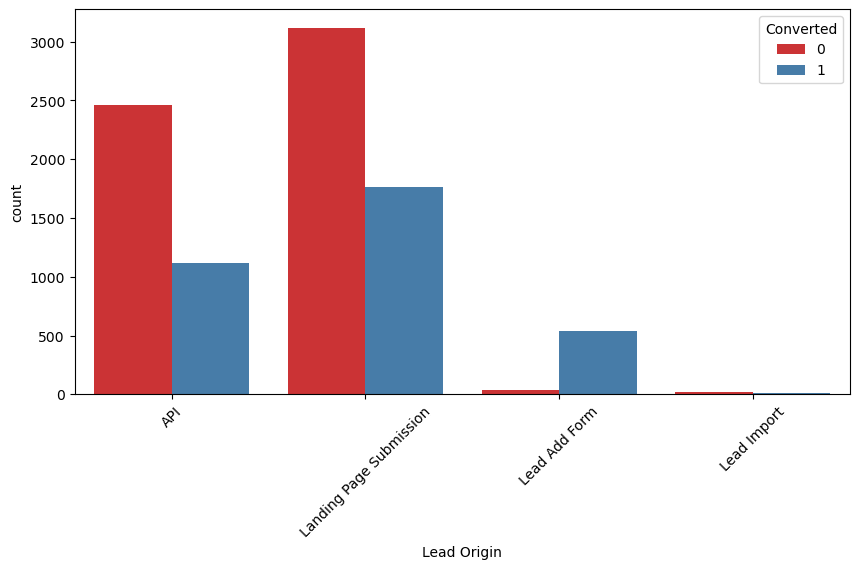

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 45)

### Lead Source

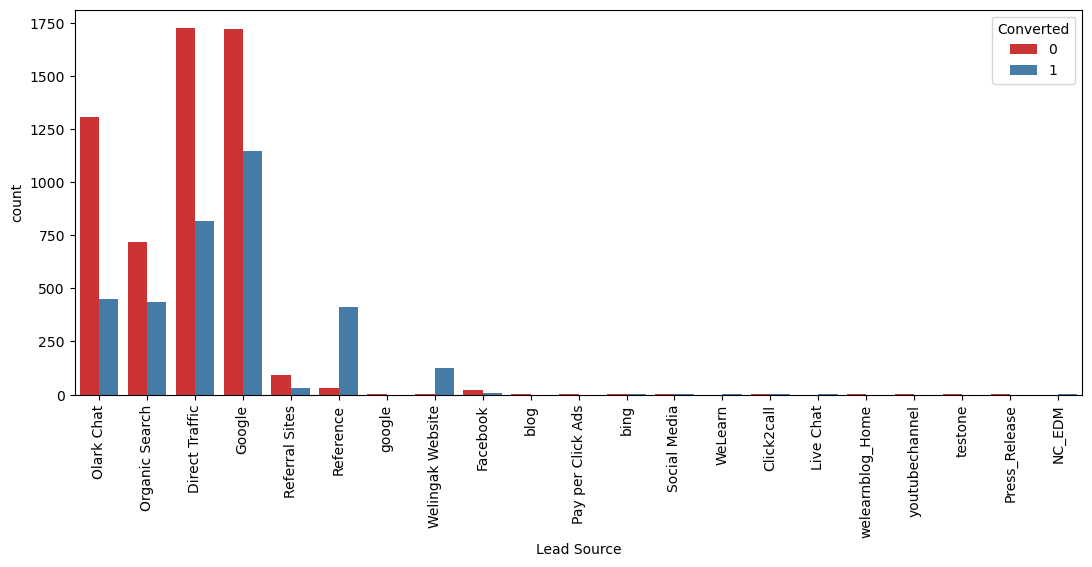

In [60]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_score_dataset, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [61]:
# Need to replace 'google' with 'Google'

lead_score_dataset['Lead Source'] = lead_score_dataset['Lead Source'].replace(['google'], 'Google')

In [62]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.

lead_score_dataset['Lead Source'] = lead_score_dataset['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

### Toatalvisits

In [63]:
lead_score_dataset['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: >

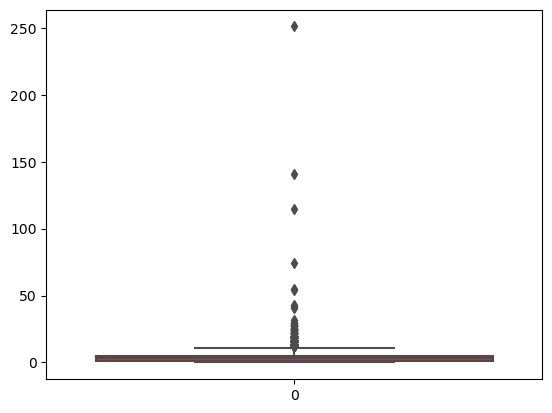

In [64]:
sns.boxplot(lead_score_dataset['TotalVisits'],orient='vert',palette='Set1')

In [ ]:
sns.boxplot(lead_score_dataset['TotalVisits'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

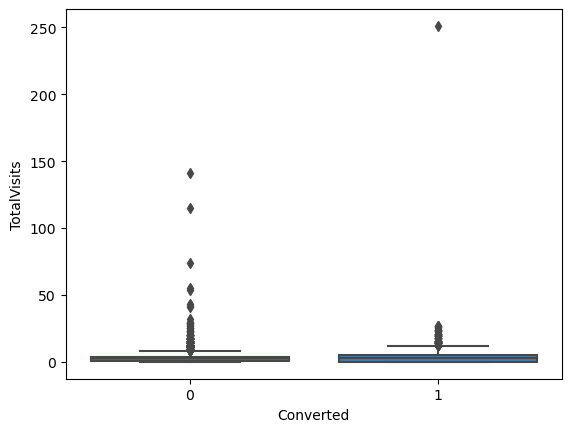

In [67]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_score_dataset,palette='Set1')

### Do not Call

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

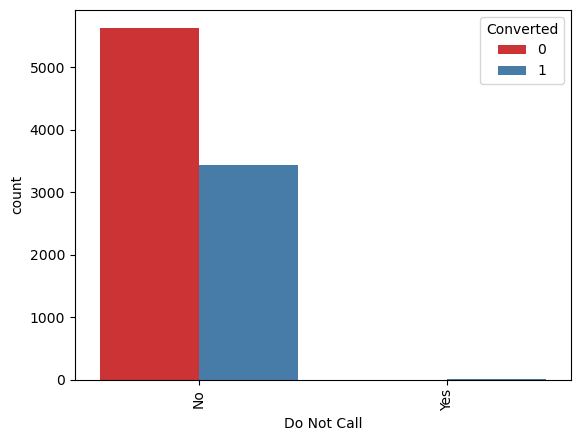

In [68]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

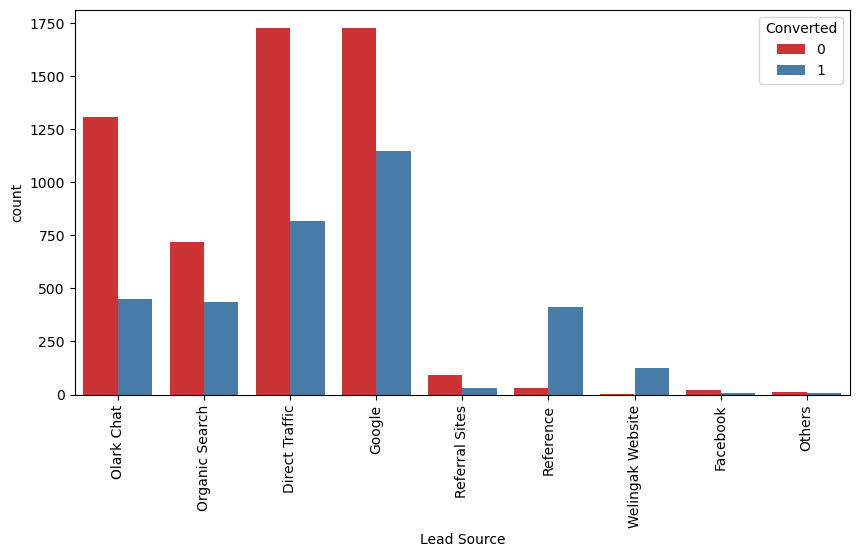

In [69]:
# Visualizing again

plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### Do not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

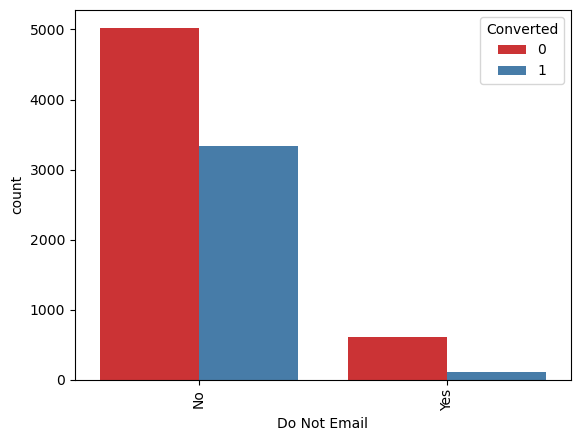

In [70]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### Total Time Spent on Website

In [71]:
lead_score_dataset['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

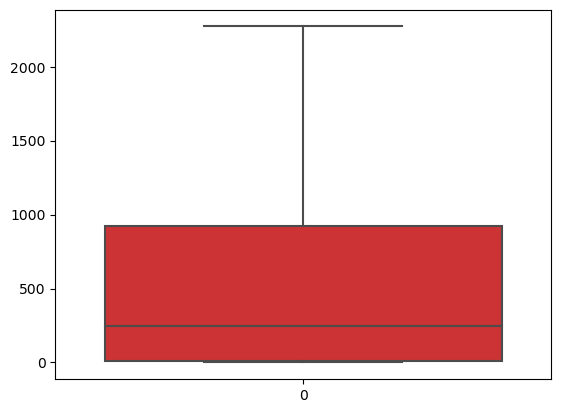

In [72]:
sns.boxplot(lead_score_dataset['Total Time Spent on Website'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

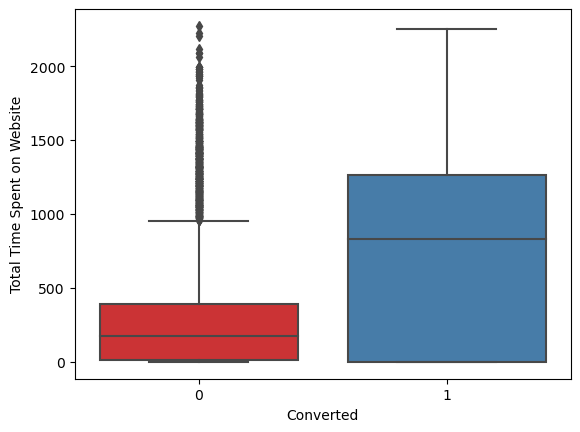

In [73]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_score_dataset,palette='Set1')

### Last Activity

In [74]:
lead_score_dataset['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

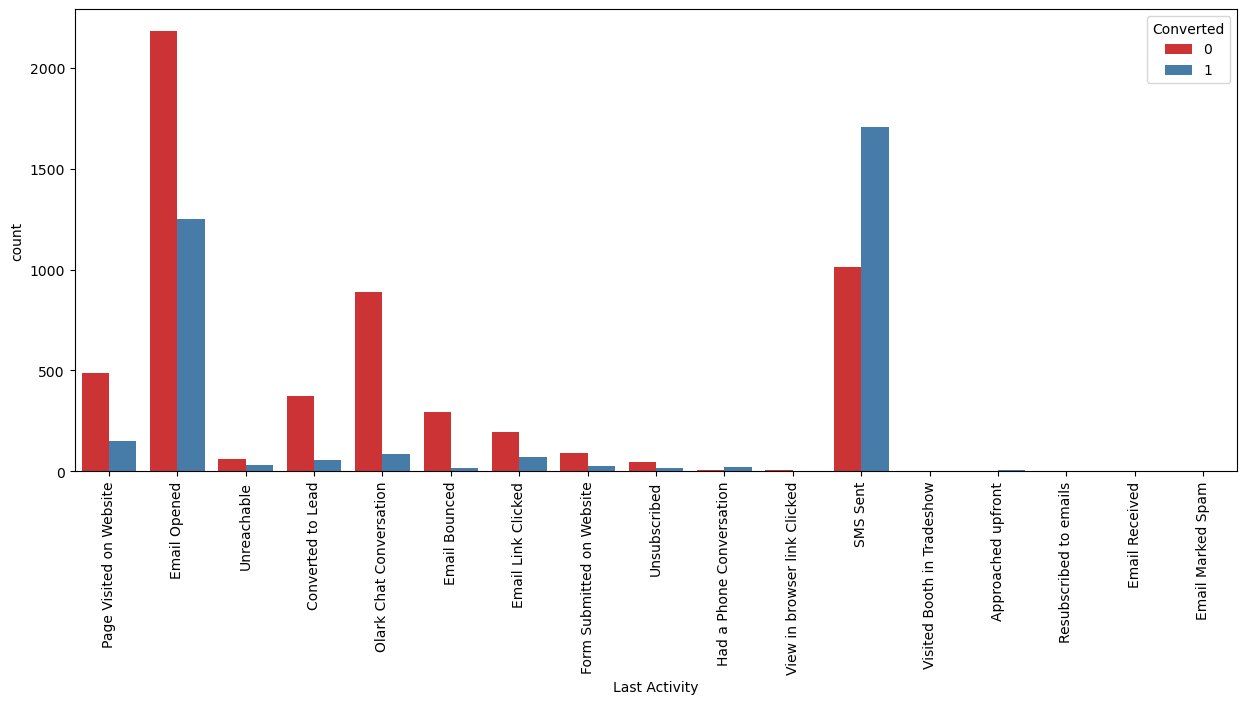

In [75]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

In [76]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_score_dataset['Last Activity'] = lead_score_dataset['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

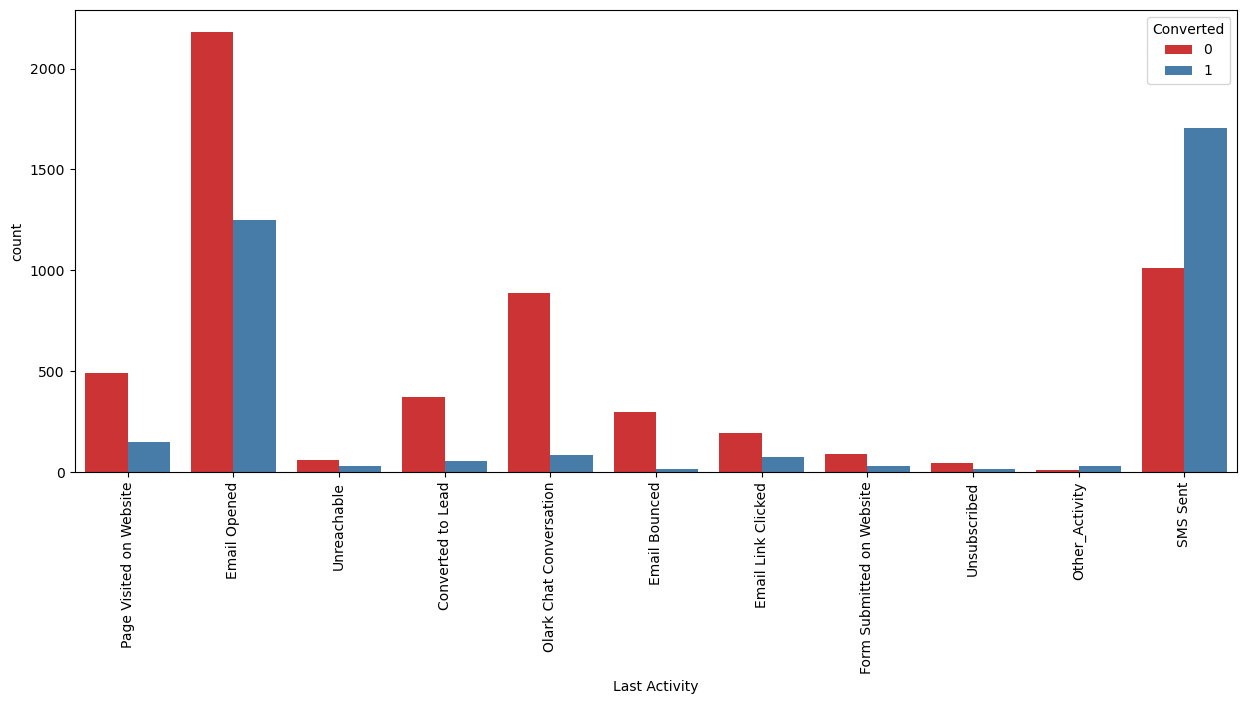

In [77]:
# Visualizing again

plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### Page Views Per Visit

In [78]:
lead_score_dataset['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

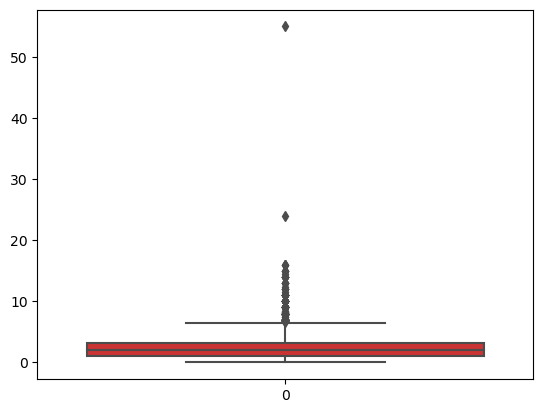

In [79]:
sns.boxplot(lead_score_dataset['Page Views Per Visit'],orient='vert',palette='Set1')

<Axes: >

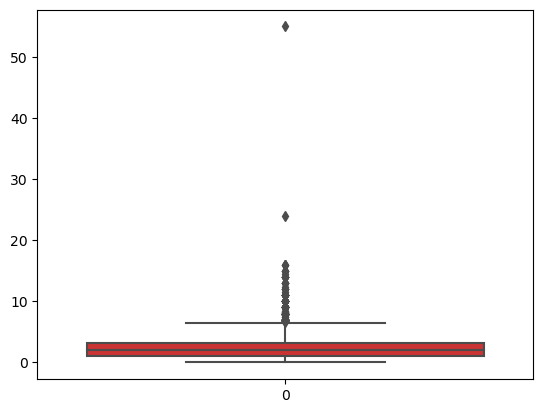

In [80]:
# Visualizing again
sns.boxplot(lead_score_dataset['Page Views Per Visit'],palette='Set1',orient='vert')

In [ ]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_score_dataset,palette='Set1')

### What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

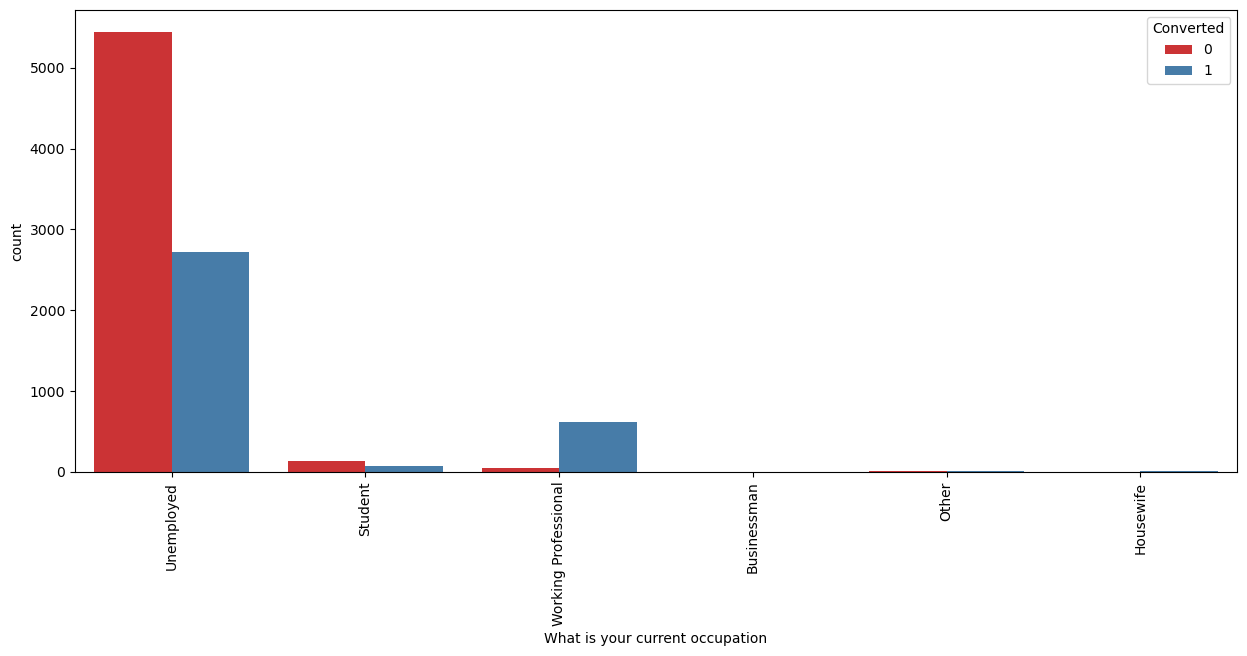

In [82]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### Magazine

(array([0]), [Text(0, 0, 'No')])

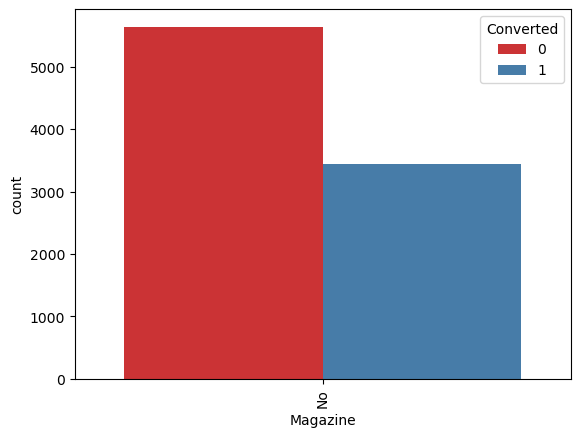

In [83]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

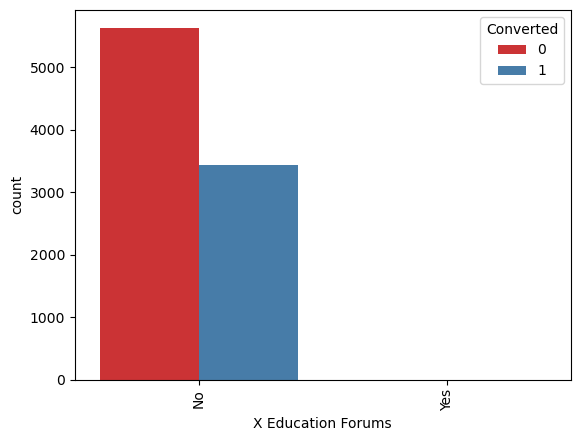

In [84]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

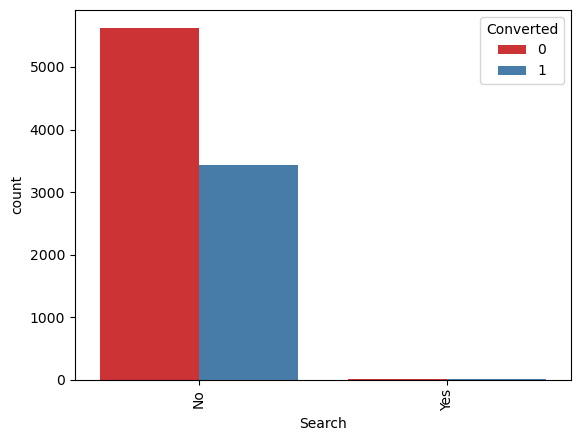

In [85]:
sns.countplot(x = "Search", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

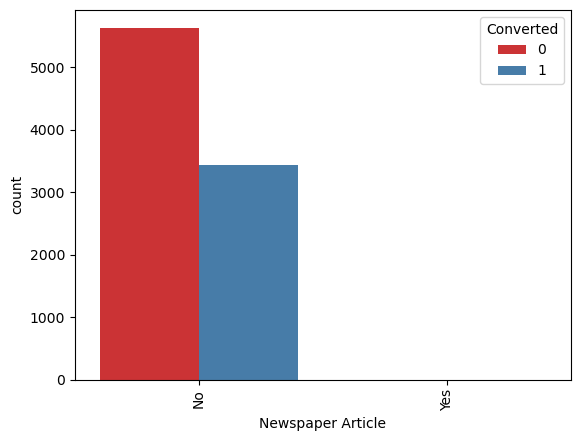

In [86]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### Newspaper

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

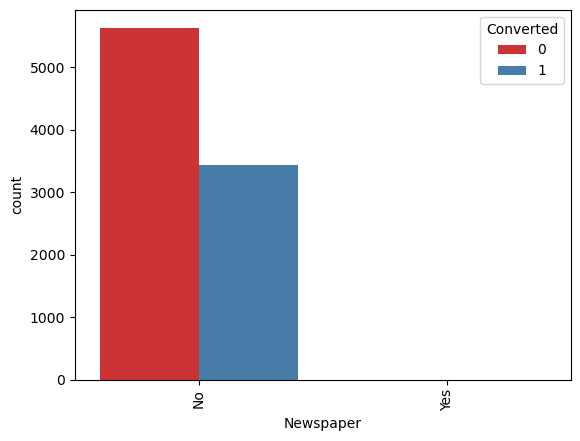

In [87]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### Through Recommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

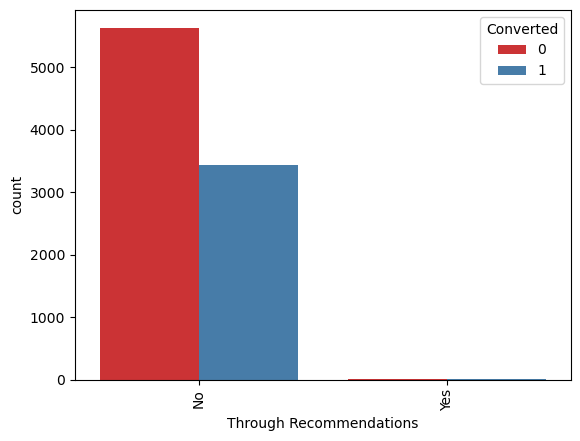

In [88]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### Digital Advertisement

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

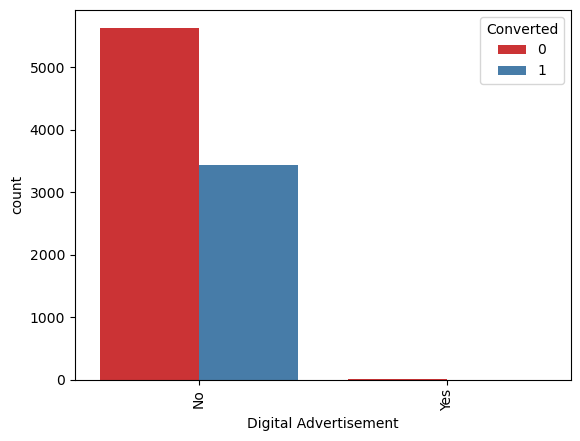

In [89]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### Receive More Updates About Our Courses

(array([0]), [Text(0, 0, 'No')])

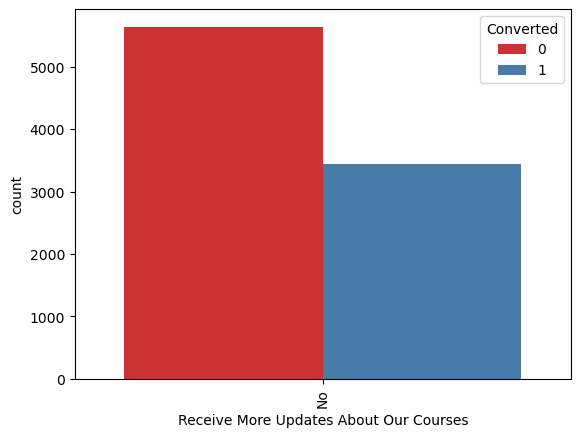

In [90]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

###  Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

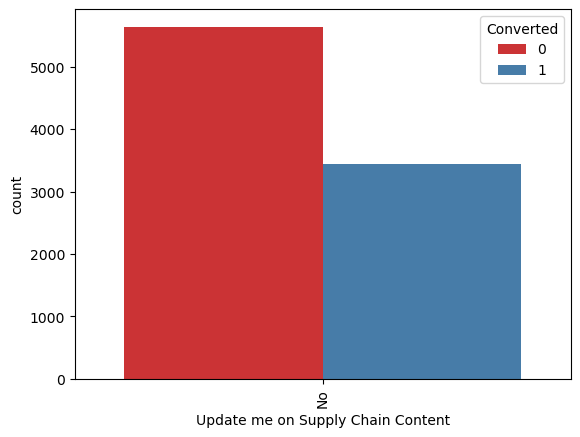

In [92]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

 ### Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

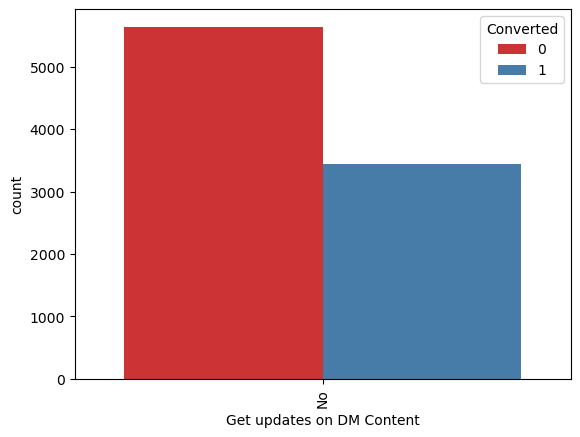

In [93]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

###  I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

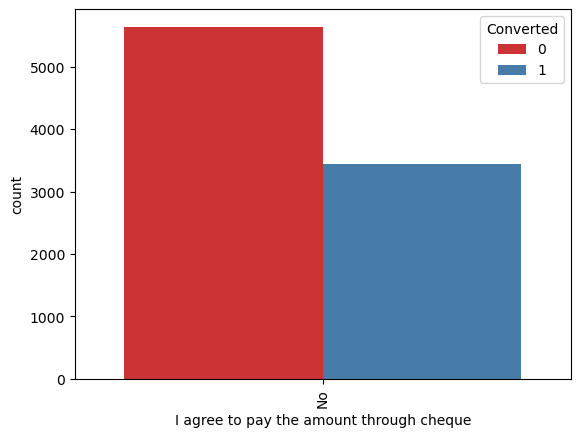

In [94]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### A free copy of Mastering The Interview

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

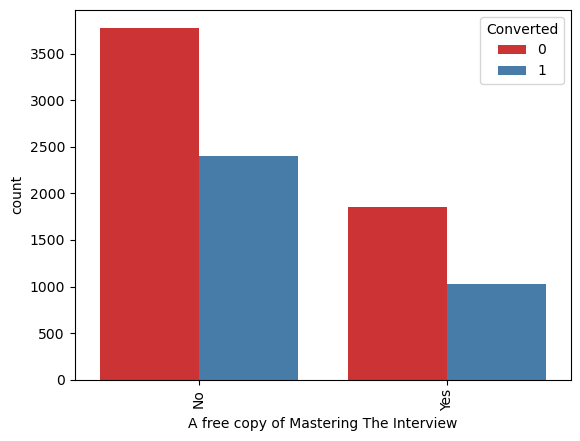

In [95]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

### Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

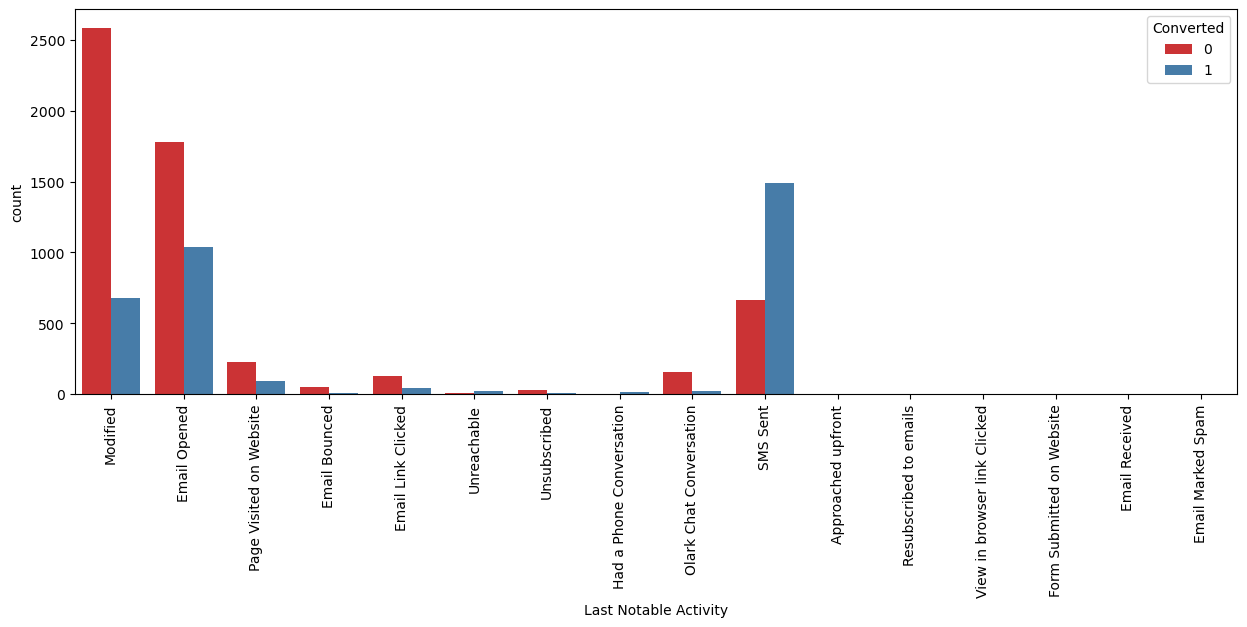

In [96]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_score_dataset,palette='Set1')
plt.xticks(rotation = 90)

#### Results
Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [98]:
lead_score_dataset = lead_score_dataset.drop(['Lead Number','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [99]:
lead_score_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Last Notable Activity            9074 non-null   object 
dtypes: float64(2), int64

In [100]:
lead_score_dataset.shape

(9074, 12)

### Preparation of data

#### Converting some binary variables (Yes/No) to 1/0

In [101]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_score_dataset[vars] = lead_score_dataset[vars].apply(binary_map)

### Creating Dummy variables for the categorical features:

In [104]:
# Creating a dummy variable for the categorical variables and dropping the first one

dummy_data = pd.get_dummies(lead_score_dataset[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Dropping the columns for which dummies were created

In [106]:
lead_score_dataset= lead_score_dataset.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Last Notable Activity'], axis = 1)

In [107]:
lead_score_dataset.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


###  Splitting the data into train and test set.¶

In [108]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X

X = lead_score_dataset.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [109]:
# Putting target variable to y

y = lead_score_dataset['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [110]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the features

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Feature Selection Using RFE 

In [115]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [116]:
rfe.support_

array([ True,  True, False,  True, False, False,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
        True, False,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False])

In [117]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 3),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activ

In [118]:
# Viewing columns selected by RFE

cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model Building

#### Model-1

In [119]:
import statsmodels.api as sm

In [120]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.6
Date:                Tue, 21 Nov 2023   Deviance:                       5241.3
Time:                        10:33:11   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3982
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2280      0.632      0.361      0.718      -1.011       1.467
Do Not Email                                            -1.6495      0.194     -8.521      0.000      -2.029      -1.270
Do Not Call                                             22.3363   3.37e+04      0.001      0.999    -6.6e+04    6.61e+04
Total Time Spent on Website                              1.1364      0.041     27.891      0.000       1.057       1.216
Lead Origin_Lead Add Form                                2.1419      0.929      2.305      0.021       0.321       3.963
Lead Origin_Lead Import                                  1.4869      0.456      3.262      0.001       0.593       2.380
Lead Source_Olark Chat                                   1.2400      0.105     11.847      0.000       1.035       1.445
Lead Source_Reference                                    1.7829      0.954      1.869      0.062      -0.087       3.652
Lead Source_Welingak Website                             3.7866      1.177      3.217      0.001       1.480       6.093
Last Activity_Email Opened                               0.7617      0.167      4.556      0.000       0.434       1.089
Last Activity_Olark Chat Conversation                   -0.5319      0.209     -2.545      0.011      -0.942      -0.122
Last Activity_Other_Activity                             2.0748      0.551      3.765      0.000       0.995       3.155
Last Activity_SMS Sent                                   1.3270      0.129     10.292      0.000       1.074       1.580
Last Activity_Unsubscribed                               1.4037      0.489      2.871      0.004       0.446       2.362
What is your current occupation_Housewife               21.4298   1.58e+04      0.001      0.999   -3.09e+04    3.09e+04
What is your current occupation_Student                 -0.9946      0.661     -1.504      0.133      -2.291       0.301
What is your current occupation_Unemployed              -1.4185      0.623     -2.275      0.023      -2.640      -0.197
What is your current occupation_Working Professional     1.3345      0.649      2.057      0.040       0.063       2.606
Last Notable Activity_Email Link Clicked                -0.5132      0.279     -1.842      0.066      -1.059       0.033
Last Notable Activity_Email Opened                      -0.8174      0.182     -4.483      0.000      -1.175      -0.460
Last Notable Activity_Had a Phone Conversation           1.3407      1.225      1.094      0.274      -1.060       3.742
Last Notable Activity_Modified                          -1.1882      0.119     -9.992      0.000      -1.421      -0.955
Last Notable Activity_Olark Chat Conversation           -0

In [121]:
# Dropping the column 'What is your current occupation_Housewife'

col1 = cols.drop('What is your current occupation_Housewife')

#### Model-2

In [122]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.2
Date:                Tue, 21 Nov 2023   Deviance:                       5244.5
Time:                        10:33:17   Pearson chi2:                 6.40e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3979
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6361      0.579      1.099      0.272      -0.499       1.771
Do Not Email                                            -1.6515      0.194     -8.523      0.000      -2.031      -1.272
Do Not Call                                             20.3365   1.24e+04      0.002      0.999   -2.43e+04    2.43e+04
Total Time Spent on Website                              1.1354      0.041     27.887      0.000       1.056       1.215
Lead Origin_Lead Add Form                                2.1410      0.929      2.305      0.021       0.320       3.962
Lead Origin_Lead Import                                  1.4845      0.456      3.256      0.001       0.591       2.378
Lead Source_Olark Chat                                   1.2380      0.105     11.830      0.000       1.033       1.443
Lead Source_Reference                                    1.7866      0.954      1.873      0.061      -0.083       3.656
Lead Source_Welingak Website                             3.7866      1.177      3.218      0.001       1.480       6.093
Last Activity_Email Opened                               0.7659      0.167      4.580      0.000       0.438       1.094
Last Activity_Olark Chat Conversation                   -0.5297      0.209     -2.532      0.011      -0.940      -0.120
Last Activity_Other_Activity                             2.0792      0.551      3.773      0.000       0.999       3.159
Last Activity_SMS Sent                                   1.3305      0.129     10.315      0.000       1.078       1.583
Last Activity_Unsubscribed                               1.4093      0.489      2.883      0.004       0.451       2.367
What is your current occupation_Student                 -1.4060      0.610     -2.304      0.021      -2.602      -0.210
What is your current occupation_Unemployed              -1.8294      0.569     -3.213      0.001      -2.945      -0.714
What is your current occupation_Working Professional     0.9236      0.597      1.547      0.122      -0.246       2.093
Last Notable Activity_Email Link Clicked                -0.5070      0.278     -1.822      0.068      -1.052       0.038
Last Notable Activity_Email Opened                      -0.8163      0.182     -4.476      0.000      -1.174      -0.459
Last Notable Activity_Had a Phone Conversation           1.3388      1.225      1.093      0.274      -1.062       3.740
Last Notable Activity_Modified                          -1.1894      0.119    -10.001      0.000      -1.422      -0.956
Last Notable Activity_Olark Chat Conversation           -0.9588      0.375     -2.555      0.011      -1.694      -0.223
Last Notable Activity_Unreachable                        1

In [123]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

#### Model-3

In [124]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.0
Date:                Tue, 21 Nov 2023   Deviance:                       5245.9
Time:                        10:33:22   Pearson chi2:                 6.40e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6464      0.579      1.117      0.264      -0.488       1.781
Do Not Email                                            -1.6553      0.194     -8.535      0.000      -2.035      -1.275
Do Not Call                                             20.3357   1.24e+04      0.002      0.999   -2.43e+04    2.43e+04
Total Time Spent on Website                              1.1346      0.041     27.874      0.000       1.055       1.214
Lead Origin_Lead Add Form                                2.1386      0.929      2.302      0.021       0.318       3.959
Lead Origin_Lead Import                                  1.4841      0.456      3.256      0.001       0.591       2.378
Lead Source_Olark Chat                                   1.2340      0.105     11.798      0.000       1.029       1.439
Lead Source_Reference                                    1.7871      0.954      1.874      0.061      -0.082       3.656
Lead Source_Welingak Website                             3.7891      1.177      3.220      0.001       1.482       6.096
Last Activity_Email Opened                               0.7702      0.167      4.606      0.000       0.442       1.098
Last Activity_Olark Chat Conversation                   -0.5242      0.209     -2.506      0.012      -0.934      -0.114
Last Activity_Other_Activity                             2.4181      0.474      5.098      0.000       1.488       3.348
Last Activity_SMS Sent                                   1.3243      0.129     10.277      0.000       1.072       1.577
Last Activity_Unsubscribed                               1.4062      0.489      2.876      0.004       0.448       2.365
What is your current occupation_Student                 -1.4068      0.610     -2.305      0.021      -2.603      -0.211
What is your current occupation_Unemployed              -1.8300      0.569     -3.215      0.001      -2.946      -0.714
What is your current occupation_Working Professional     0.9213      0.597      1.544      0.123      -0.248       2.091
Last Notable Activity_Email Link Clicked                -0.5153      0.278     -1.853      0.064      -1.060       0.030
Last Notable Activity_Email Opened                      -0.8294      0.182     -4.556      0.000      -1.186      -0.473
Last Notable Activity_Modified                          -1.2023      0.118    -10.147      0.000      -1.434      -0.970
Last Notable Activity_Olark Chat Conversation           -0.9713      0.375     -2.589      0.010      -1.707      -0.236
Last Notable Activity_Unreachable                        1.5861      0.490      3.239      0.001       0.626       2.546
==========================================================

In [125]:
col1 = col1.drop('What is your current occupation_Student')

#### MOdel-4

In [126]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.8
Date:                Tue, 21 Nov 2023   Deviance:                       5251.5
Time:                        10:33:26   Pearson chi2:                 6.41e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3972
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5565      0.239     -2.327      0.020      -1.025      -0.088
Do Not Email                                            -1.6532      0.194     -8.540      0.000      -2.033      -1.274
Do Not Call                                             20.3277   1.24e+04      0.002      0.999   -2.43e+04    2.43e+04
Total Time Spent on Website                              1.1362      0.041     27.924      0.000       1.056       1.216
Lead Origin_Lead Add Form                                2.1406      0.929      2.304      0.021       0.320       3.962
Lead Origin_Lead Import                                  1.4858      0.456      3.259      0.001       0.592       2.379
Lead Source_Olark Chat                                   1.2309      0.105     11.778      0.000       1.026       1.436
Lead Source_Reference                                    1.7949      0.954      1.882      0.060      -0.075       3.664
Lead Source_Welingak Website                             3.7878      1.177      3.218      0.001       1.481       6.095
Last Activity_Email Opened                               0.7629      0.167      4.571      0.000       0.436       1.090
Last Activity_Olark Chat Conversation                   -0.5281      0.209     -2.528      0.011      -0.937      -0.119
Last Activity_Other_Activity                             2.4133      0.474      5.087      0.000       1.484       3.343
Last Activity_SMS Sent                                   1.3190      0.129     10.244      0.000       1.067       1.571
Last Activity_Unsubscribed                               1.4005      0.489      2.865      0.004       0.442       2.359
What is your current occupation_Unemployed              -0.6239      0.207     -3.017      0.003      -1.029      -0.219
What is your current occupation_Working Professional     2.1264      0.275      7.735      0.000       1.588       2.665
Last Notable Activity_Email Link Clicked                -0.5174      0.278     -1.864      0.062      -1.061       0.027
Last Notable Activity_Email Opened                      -0.8258      0.182     -4.542      0.000      -1.182      -0.469
Last Notable Activity_Modified                          -1.1982      0.118    -10.116      0.000      -1.430      -0.966
Last Notable Activity_Olark Chat Conversation           -0.9810      0.375     -2.613      0.009      -1.717      -0.245
Last Notable Activity_Unreachable                        1.5889      0.489      3.251      0.001       0.631       2.547
========================================================================================================================
"""

In [127]:
col1 = col1.drop('Lead Origin_Lead Add Form')

#### Model-5

In [129]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.7
Date:                Tue, 21 Nov 2023   Deviance:                       5257.5
Time:                        10:33:37   Pearson chi2:                 6.40e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3966
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5481      0.239     -2.294      0.022      -1.016      -0.080
Do Not Email                                            -1.6576      0.193     -8.568      0.000      -2.037      -1.278
Do Not Call                                             20.3282   1.24e+04      0.002      0.999   -2.43e+04    2.43e+04
Total Time Spent on Website                              1.1338      0.041     27.916      0.000       1.054       1.213
Lead Origin_Lead Import                                  1.4802      0.456      3.248      0.001       0.587       2.374
Lead Source_Olark Chat                                   1.2298      0.104     11.789      0.000       1.025       1.434
Lead Source_Reference                                    3.9300      0.229     17.170      0.000       3.481       4.379
Lead Source_Welingak Website                             5.9232      0.726      8.154      0.000       4.500       7.347
Last Activity_Email Opened                               0.7626      0.167      4.574      0.000       0.436       1.089
Last Activity_Olark Chat Conversation                   -0.5342      0.209     -2.560      0.010      -0.943      -0.125
Last Activity_Other_Activity                             2.4046      0.474      5.071      0.000       1.475       3.334
Last Activity_SMS Sent                                   1.3124      0.128     10.218      0.000       1.061       1.564
Last Activity_Unsubscribed                               1.3946      0.489      2.855      0.004       0.437       2.352
What is your current occupation_Unemployed              -0.6203      0.207     -3.001      0.003      -1.025      -0.215
What is your current occupation_Working Professional     2.1258      0.275      7.736      0.000       1.587       2.664
Last Notable Activity_Email Link Clicked                -0.5284      0.277     -1.906      0.057      -1.072       0.015
Last Notable Activity_Email Opened                      -0.8336      0.182     -4.589      0.000      -1.190      -0.478
Last Notable Activity_Modified                          -1.2035      0.118    -10.174      0.000      -1.435      -0.972
Last Notable Activity_Olark Chat Conversation           -0.9853      0.375     -2.627      0.009      -1.721      -0.250
Last Notable Activity_Unreachable                        1.5769      0.489      3.228      0.001       0.619       2.534
========================================================================================================================
"""

#### VIF Values

In [130]:
# Check for the VIF values of the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.70
15,Last Notable Activity_Email Opened,8.59
7,Last Activity_Email Opened,8.19
16,Last Notable Activity_Modified,3.70
10,Last Activity_SMS Sent,3.43
8,Last Activity_Olark Chat Conversation,2.26
13,What is your current occupation_Working Profes...,1.83
4,Lead Source_Olark Chat,1.78
17,Last Notable Activity_Olark Chat Conversation,1.41
2,Total Time Spent on Website,1.32


In [131]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF

col1 = col1.drop('What is your current occupation_Unemployed')

#### Model-6

In [132]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.1
Date:                Tue, 21 Nov 2023   Deviance:                       5266.2
Time:                        10:33:50   Pearson chi2:                 6.43e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3958
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1512      0.131     -8.807      0.000      -1.407      -0.895
Do Not Email                                            -1.6482      0.194     -8.509      0.000      -2.028      -1.269
Do Not Call                                             20.2946   1.24e+04      0.002      0.999   -2.43e+04    2.43e+04
Total Time Spent on Website                              1.1343      0.041     27.942      0.000       1.055       1.214
Lead Origin_Lead Import                                  1.4598      0.455      3.205      0.001       0.567       2.352
Lead Source_Olark Chat                                   1.2304      0.104     11.797      0.000       1.026       1.435
Lead Source_Reference                                    3.9510      0.229     17.281      0.000       3.503       4.399
Lead Source_Welingak Website                             5.9068      0.726      8.133      0.000       4.483       7.330
Last Activity_Email Opened                               0.7669      0.167      4.601      0.000       0.440       1.094
Last Activity_Olark Chat Conversation                   -0.5270      0.209     -2.526      0.012      -0.936      -0.118
Last Activity_Other_Activity                             2.3881      0.474      5.036      0.000       1.459       3.318
Last Activity_SMS Sent                                   1.3017      0.128     10.143      0.000       1.050       1.553
Last Activity_Unsubscribed                               1.3692      0.489      2.803      0.005       0.412       2.327
What is your current occupation_Working Professional     2.7267      0.189     14.438      0.000       2.357       3.097
Last Notable Activity_Email Link Clicked                -0.5268      0.277     -1.903      0.057      -1.070       0.016
Last Notable Activity_Email Opened                      -0.8290      0.181     -4.568      0.000      -1.185      -0.473
Last Notable Activity_Modified                          -1.2052      0.118    -10.196      0.000      -1.437      -0.974
Last Notable Activity_Olark Chat Conversation           -0.9758      0.374     -2.607      0.009      -1.709      -0.242
Last Notable Activity_Unreachable                        1.5662      0.487      3.214      0.001       0.611       2.521
========================================================================================================================
"""

In [133]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue

col1 = col1.drop('Lead Origin_Lead Import')

#### Model-7

In [134]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.4
Date:                Tue, 21 Nov 2023   Deviance:                       5274.9
Time:                        10:33:54   Pearson chi2:                 6.42e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3950
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1498      0.131     -8.810      0.000      -1.406      -0.894
Do Not Email                                            -1.6481      0.193     -8.522      0.000      -2.027      -1.269
Do Not Call                                             20.2979   1.24e+04      0.002      0.999   -2.43e+04    2.43e+04
Total Time Spent on Website                              1.1229      0.040     27.864      0.000       1.044       1.202
Lead Source_Olark Chat                                   1.2080      0.104     11.637      0.000       1.005       1.411
Lead Source_Reference                                    3.9266      0.228     17.193      0.000       3.479       4.374
Lead Source_Welingak Website                             5.8836      0.726      8.102      0.000       4.460       7.307
Last Activity_Email Opened                               0.7734      0.167      4.644      0.000       0.447       1.100
Last Activity_Olark Chat Conversation                   -0.5258      0.208     -2.523      0.012      -0.934      -0.117
Last Activity_Other_Activity                             2.3844      0.473      5.037      0.000       1.457       3.312
Last Activity_SMS Sent                                   1.3069      0.128     10.199      0.000       1.056       1.558
Last Activity_Unsubscribed                               1.3738      0.487      2.818      0.005       0.418       2.329
What is your current occupation_Working Professional     2.7336      0.189     14.479      0.000       2.364       3.104
Last Notable Activity_Email Link Clicked                -0.5198      0.277     -1.880      0.060      -1.062       0.022
Last Notable Activity_Email Opened                      -0.8180      0.181     -4.510      0.000      -1.173      -0.462
Last Notable Activity_Modified                          -1.1966      0.118    -10.137      0.000      -1.428      -0.965
Last Notable Activity_Olark Chat Conversation           -0.9620      0.374     -2.574      0.010      -1.694      -0.230
Last Notable Activity_Unreachable                        1.5648      0.487      3.215      0.001       0.611       2.519
========================================================================================================================
"""

#### VIF Values

In [135]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Email Opened,7.82
13,Last Notable Activity_Email Opened,7.25
7,Last Activity_Olark Chat Conversation,2.17
14,Last Notable Activity_Modified,2.09
3,Lead Source_Olark Chat,1.76
15,Last Notable Activity_Olark Chat Conversation,1.34
9,Last Activity_SMS Sent,1.31
2,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.24
0,Do Not Email,1.21


In [136]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables

col1 = col1.drop('Last Activity_Unsubscribed')

#### Model-8

In [137]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.0
Date:                Tue, 21 Nov 2023   Deviance:                       5282.0
Time:                        10:34:00   Pearson chi2:                 6.42e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3943
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0994      0.128     -8.560      0.000      -1.351      -0.848
Do Not Email                                            -1.5039      0.181     -8.312      0.000      -1.859      -1.149
Do Not Call                                             20.3027   1.24e+04      0.002      0.999   -2.43e+04    2.43e+04
Total Time Spent on Website                              1.1239      0.040     27.905      0.000       1.045       1.203
Lead Source_Olark Chat                                   1.2132      0.104     11.690      0.000       1.010       1.417
Lead Source_Reference                                    3.9227      0.228     17.193      0.000       3.476       4.370
Lead Source_Welingak Website                             5.8576      0.725      8.079      0.000       4.437       7.279
Last Activity_Email Opened                               0.7530      0.166      4.538      0.000       0.428       1.078
Last Activity_Olark Chat Conversation                   -0.5487      0.208     -2.640      0.008      -0.956      -0.141
Last Activity_Other_Activity                             2.3443      0.474      4.950      0.000       1.416       3.272
Last Activity_SMS Sent                                   1.2537      0.126      9.957      0.000       1.007       1.500
What is your current occupation_Working Professional     2.7342      0.188     14.524      0.000       2.365       3.103
Last Notable Activity_Email Link Clicked                -0.5716      0.276     -2.074      0.038      -1.112      -0.032
Last Notable Activity_Email Opened                      -0.8490      0.181     -4.693      0.000      -1.204      -0.494
Last Notable Activity_Modified                          -1.2277      0.117    -10.458      0.000      -1.458      -0.998
Last Notable Activity_Olark Chat Conversation           -0.9959      0.373     -2.667      0.008      -1.728      -0.264
Last Notable Activity_Unreachable                        1.5110      0.486      3.112      0.002       0.559       2.463
========================================================================================================================
"""

#### VIF Values

In [138]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
6,Last Activity_Email Opened,7.82
12,Last Notable Activity_Email Opened,7.25
7,Last Activity_Olark Chat Conversation,2.17
13,Last Notable Activity_Modified,2.09
3,Lead Source_Olark Chat,1.76
14,Last Notable Activity_Olark Chat Conversation,1.34
2,Total Time Spent on Website,1.30
9,Last Activity_SMS Sent,1.30
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18


In [139]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables

col1 = col1.drop('Last Notable Activity_Unreachable')

#### Model-9

In [140]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.0
Date:                Tue, 21 Nov 2023   Deviance:                       5291.9
Time:                        10:34:06   Pearson chi2:                 6.41e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3934
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9949      0.123     -8.077      0.000      -1.236      -0.753
Do Not Email                                            -1.5383      0.181     -8.521      0.000      -1.892      -1.184
Do Not Call                                             20.3009   1.24e+04      0.002      0.999   -2.43e+04    2.43e+04
Total Time Spent on Website                              1.1203      0.040     27.876      0.000       1.041       1.199
Lead Source_Olark Chat                                   1.2088      0.104     11.654      0.000       1.005       1.412
Lead Source_Reference                                    3.9240      0.228     17.204      0.000       3.477       4.371
Lead Source_Welingak Website                             5.8587      0.725      8.078      0.000       4.437       7.280
Last Activity_Email Opened                               0.7087      0.165      4.303      0.000       0.386       1.031
Last Activity_Olark Chat Conversation                   -0.5927      0.207     -2.865      0.004      -0.998      -0.187
Last Activity_Other_Activity                             2.2753      0.474      4.803      0.000       1.347       3.204
Last Activity_SMS Sent                                   1.1641      0.122      9.544      0.000       0.925       1.403
What is your current occupation_Working Professional     2.7351      0.188     14.556      0.000       2.367       3.103
Last Notable Activity_Email Link Clicked                -0.6748      0.273     -2.469      0.014      -1.210      -0.139
Last Notable Activity_Email Opened                      -0.9079      0.180     -5.047      0.000      -1.260      -0.555
Last Notable Activity_Modified                          -1.2863      0.116    -11.099      0.000      -1.513      -1.059
Last Notable Activity_Olark Chat Conversation           -1.0523      0.373     -2.823      0.005      -1.783      -0.322
========================================================================================================================
"""

#### VIF Values

In [141]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Email Opened,7.82
12,Last Notable Activity_Email Opened,7.25
7,Last Activity_Olark Chat Conversation,2.17
13,Last Notable Activity_Modified,2.09
3,Lead Source_Olark Chat,1.76
14,Last Notable Activity_Olark Chat Conversation,1.34
2,Total Time Spent on Website,1.30
9,Last Activity_SMS Sent,1.30
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18


##### Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

#### Doing Prediction on the Train set

In [142]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.202033
1012    0.400552
9226    0.288272
4750    0.881860
7987    0.758266
1281    0.767852
2880    0.101433
4971    0.909045
7536    0.867145
1248    0.723998
dtype: float64

In [143]:
# Reshaping into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20203299, 0.40055197, 0.28827245, 0.88185986, 0.75826632,
       0.7678523 , 0.10143252, 0.90904488, 0.86714519, 0.72399757])

In [144]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.202033,3009
1,0,0.400552,1012
2,0,0.288272,9226
3,1,0.881860,4750
4,1,0.758266,7987


In [145]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.202033,3009,0
1,0,0.400552,1012,0
2,0,0.288272,9226,0
3,1,0.881860,4750,1
4,1,0.758266,7987,1


#### Confusion matrix

In [146]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3461  444]
 [ 740 1706]]


In [147]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8135726657219335


In [148]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
# Sensitivity of our logistic regression model  

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6974652493867539


In [150]:
# Let us calculate specificity

print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8862996158770806


In [151]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted

print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11370038412291933


In [152]:
# positive predictive value

print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7934883720930233


In [153]:
# Negative predictive value

print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8238514639371578


##### We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.¶

#### Plotting the ROC Curve¶
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [154]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

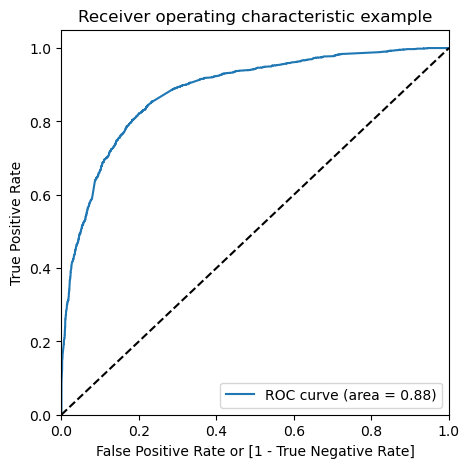

In [157]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Since we have higher (0.88) area under the ROC curve , therefore our model is a good one.

Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [158]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.202033,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.400552,1012,0,1,1,1,1,1,0,0,0,0,0
2,0,0.288272,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.881860,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.758266,7987,1,1,1,1,1,1,1,1,1,0,0


In [159]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.589671  0.972608  0.349808
0.2   0.2  0.746969  0.914963  0.641741
0.3   0.3  0.802393  0.841783  0.777721
0.4   0.4  0.812628  0.768602  0.840205
0.5   0.5  0.813573  0.697465  0.886300
0.6   0.6  0.793576  0.586672  0.923175
0.7   0.7  0.779090  0.510630  0.947247
0.8   0.8  0.758778  0.421096  0.970294
0.9   0.9  0.711699  0.269419  0.988732


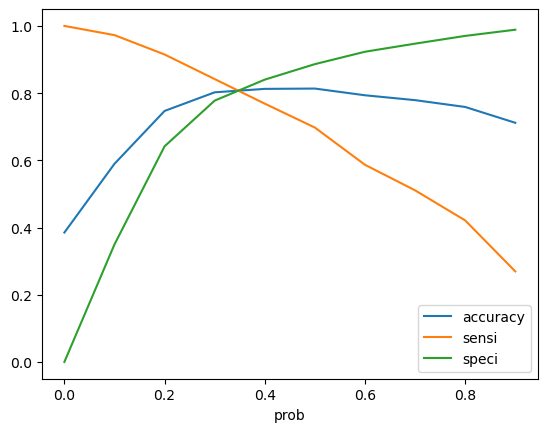

In [160]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [161]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.202033,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.400552,1012,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.288272,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.881860,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.758266,7987,1,1,1,1,1,1,1,1,1,0,0,1


#### Assigning Lead Score to the Training data

In [162]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.202033,3009,0,1,1,1,0,0,0,0,0,0,0,0,20
1,0,0.400552,1012,0,1,1,1,1,1,0,0,0,0,0,1,40
2,0,0.288272,9226,0,1,1,1,0,0,0,0,0,0,0,0,29
3,1,0.881860,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.758266,7987,1,1,1,1,1,1,1,1,1,0,0,1,76


#### Model Evaluation

In [163]:
# Let's check the overall accuracy

print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8090064556762715


In [164]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3150,  755],
       [ 458, 1988]], dtype=int64)

In [165]:
TP = confusion2[1,1]             # true positive 
TN = confusion2[0,0]             # true negatives
FP = confusion2[0,1]             # false positives
FN = confusion2[1,0]             # false negatives

In [166]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.812755519215045


In [167]:
# Let us calculate specificity

print("Specificity :",TN / float(TN+FP))

Specificity : 0.8066581306017926


In [168]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted

print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19334186939820744


In [169]:
# Positive predictive value 

print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7247539190667153


In [170]:
# Negative predictive value

print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.873059866962306


#### Precision and Recall
Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.

Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [171]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3461,  444],
       [ 740, 1706]], dtype=int64)

In [172]:
# Precision

TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7934883720930233


In [174]:
# Recall

TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6974652493867539


In [175]:
from sklearn.metrics import precision_score, recall_score

In [176]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7934883720930233


In [177]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6974652493867539


#### Precision and recall tradeoff

In [178]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [179]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

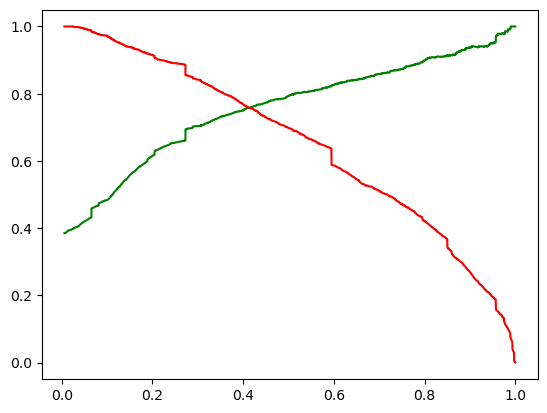

In [180]:
# plotting a trade-off curve between precision and recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making predictions on the test set¶
#### Scaling the test data

In [181]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [182]:
# Assigning the columns selected by the final model to the X_test 

X_test = X_test[col1]
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3271,0,0,-0.600595,0,0,0,1,0,0,0,0,0,1,0,0
1490,0,0,1.887326,0,0,0,1,0,0,0,1,0,1,0,0
7936,0,0,-0.752879,0,0,0,1,0,0,0,0,0,1,0,0
4216,0,0,-0.888650,0,1,0,1,0,0,0,0,0,0,1,0
3830,0,0,-0.587751,0,0,0,1,0,0,0,0,0,1,0,0


In [183]:
# Adding a const

X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.133897
1490    0.974797
7936    0.115318
4216    0.795105
3830    0.135574
1800    0.668551
6507    0.363283
4821    0.312631
4223    0.956799
4714    0.288272
dtype: float64

In [184]:
# Converting y_test_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [185]:
# Let's see the head

y_pred_1.head()

,0
3271,0.133897
1490,0.974797
7936,0.115318
4216,0.795105
3830,0.135574


In [186]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [187]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [188]:
# Removing index for both dataframes to append them side by side  

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [189]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [190]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.133897
1,1,1490,0.974797
2,0,7936,0.115318
3,1,4216,0.795105
4,0,3830,0.135574


In [191]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [192]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [193]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.133897
1,1490,1,0.974797
2,7936,0,0.115318
3,4216,1,0.795105
4,3830,0,0.135574


In [194]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [195]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.133897,0
1,1490,1,0.974797,1
2,7936,0,0.115318,0
3,4216,1,0.795105,1
4,3830,0,0.135574,0


In [196]:
# Let's check the overall accuracy.

print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8005875872199779


In [197]:
# Making the confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1391,  343],
       [ 200,  789]], dtype=int64)

In [198]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [199]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7977755308392316


In [200]:
# Let us calculate specificity

print("Specificity :",TN / float(TN+FP))

Specificity : 0.8021914648212226


#### Assigning Lead Score to the Testing data

In [201]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.133897,0,13
1,1490,1,0.974797,1,97
2,7936,0,0.115318,0,12
3,4216,1,0.795105,1,80
4,3830,0,0.135574,0,14


#### Observations:
After running the model on the Test Data , we obtain:

Accuracy : 80.4 %
Sensitivity : 80.4 %
Specificity : 80.5 %
    
Results :
    
Comparing the values obtained for Train & Test:
Train Data:
Accuracy : 81.0 %
Sensitivity : 81.7 %
Specificity : 80.6 %
Test Data:
Accuracy : 80.4 %
Sensitivity : 80.4 %
Specificity : 80.5 %
Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%. 

#### Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [202]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.974797,1,97
8,4223,1,0.956799,1,96
21,2461,1,0.993519,1,99
23,5822,1,0.997079,1,100
25,2684,1,0.997079,1,100
...,...,...,...,...,...
2694,1566,1,0.956735,1,96
2699,6461,1,0.898133,1,90
2703,5741,1,0.920563,1,92
2715,6299,1,0.888542,1,89


#### So there are 361 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [203]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518, 4543,
       4830, 4365, 3542, 7674, 8596, 4003, 4963, 6947, 4807,  446,  789,
       8372, 5805, 3758,  337, 1561,  737, 9034, 6423, 8286, 7174, 4461,
       1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490, 1995,
       6532, 4498, 5797, 8687, 7653,   76, 2018, 3307, 3976, 5769, 1663,
       3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481, 3265, 3285,
       3858, 8106, 8207,  373, 3055, 7417, 4179, 8568, 7268, 4353, 5141,
       6784, 6754, 7236, 2960, 7753, 3983, 4487,  802, 8745, 4717,  505,
       8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 3827, 7175, 1675,
       6999, 5826, 6499, 2481, 3439, 4612, 4793, 1557, 2495,  822, 8111,
       2378, 5090, 5075, 7699, 5638, 2342, 8077, 2727,  720,  941, 2961,
       1542, 5656, 2630, 6728, 8205, 6332, 8461, 5135, 2427, 5087,  174,
       2674, 8065, 1568, 8597, 4865, 4708, 1304, 6066, 6538, 5700, 1388,
       5815, 7970, 7902, 5804, 5042, 4081, 6684, 19

#### Finding out the Important Features from our final model:

In [204]:
res.params.sort_values(ascending=False)

Do Not Call                                             20.300939
Lead Source_Welingak Website                             5.858710
Lead Source_Reference                                    3.924011
What is your current occupation_Working Professional     2.735060
Last Activity_Other_Activity                             2.275323
Lead Source_Olark Chat                                   1.208765
Last Activity_SMS Sent                                   1.164133
Total Time Spent on Website                              1.120261
Last Activity_Email Opened                               0.708655
Last Activity_Olark Chat Conversation                   -0.592660
Last Notable Activity_Email Link Clicked                -0.674788
Last Notable Activity_Email Opened                      -0.907862
const                                                   -0.994902
Last Notable Activity_Olark Chat Conversation           -1.052257
Last Notable Activity_Modified                          -1.286265
Do Not Ema

#### Recommendations:
    
##### The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
##### The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
##### The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
##### The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
##### The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
##### The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted
##### The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
##### The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.


#### Summary
There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion.
First, sort out the best prospects from the leads you have generated. 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' which contribute most towards the probability of a lead getting converted.
Then, You must keep a list of leads handy so that you can inform them about new courses, services, job offers and future higher studies. Monitor each lead carefully so that you can tailor the information you send to them. Carefully provide job offerings, information or courses that suits best according to the interest of the leads. A proper plan to chart the needs of each lead will go a long way to capture the leads as prospects.
Focus on converted leads. Hold question-answer sessions with leads to extract the right information you need about them. Make further inquiries and appointments with the leads to determine their intention and mentality to join online courses.